In [203]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
%matplotlib inline

In [186]:
#Convolution function with padding from Project 1
def pad_image(image, pad = 0, w_row = 0, w_col = 0):

    '''Bottom right pixel is considered as center for 2x2 kernel.
    pad = 0, zero padding
    pad = 1, wrap around
    pad = 2, copy edge
    pad = 3, reflect across edge'''
    
    #row padding values corresponding to different kernel sizes
    top_row_padding = int(np.ceil((w_row-1)/2))
    bottom_row_padding = int(np.floor((w_row-1)/2))
    
    #col padding values corresponding to different kernel sizes
    left_col_padding = int(np.ceil((w_col-1)/2))
    right_col_padding = int(np.floor((w_col-1)/2))
    
    #pad = 0, zero padding
    #By default zero padding is being implemented and when the 'pad' has a differnt value, 
    #then it goes through the if statements below and makes the necessary changes   
    padded_dimensions = (image.shape[0] + top_row_padding + bottom_row_padding, 
                   image.shape[1] + left_col_padding + right_col_padding)


    padded_image = np.zeros(padded_dimensions)


    #inserting original to padded image
    padded_image[top_row_padding : top_row_padding + image.shape[0], 
                 left_col_padding : left_col_padding + image.shape[1]] = image
        
    if pad == 1:   #pad = 1, wrap around        
        
        #top row padding
        if top_row_padding != 0:
            padded_image[0 : top_row_padding, : ] = padded_image[-1*(top_row_padding+bottom_row_padding)
                                                                 : top_row_padding + image.shape[0], : ]
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = padded_image[top_row_padding
                                                                        : top_row_padding + bottom_row_padding, :]
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = padded_image[ : ,
                                                        left_col_padding : left_col_padding + right_col_padding]
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = padded_image[ : ,
                                    -1*(left_col_padding+right_col_padding) : left_col_padding + image.shape[1]]
    
    elif pad == 2:    #pad = 2, copy edge        
        
        #top row padding
        if top_row_padding != 0:
            padded_image[0 : top_row_padding, : ] = padded_image[[top_row_padding], : ]
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = padded_image[[-1*bottom_row_padding], :]
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = padded_image[ : ,[-1*(right_col_padding)-1]]
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = padded_image[ : ,[left_col_padding]]
            
    elif pad == 3:     #pad = 3, reflect across edge

        #top row padding
        if top_row_padding != 0:
            padded_image[0 : top_row_padding, : ] = np.flip(padded_image[top_row_padding :
                                                                         2*top_row_padding, :],axis = 0)
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = np.flip(padded_image[-2*(bottom_row_padding) :
                                                                        -1*(bottom_row_padding), : ], axis = 0)
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = np.flip(padded_image[ : ,-2*(right_col_padding) :
                                                                        -1*(right_col_padding)], axis = 1)
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = np.flip(padded_image[ : ,left_col_padding :
                                                                          2* left_col_padding], axis = 1)

    return padded_image

#Convolution operation on a section of the image whose size is the same as that of the kernel
def convolution(f,w):
    conv_result = np.sum(f*w)
    return conv_result

#This function performs SAME type of convolution
def conv2(f,w,pad):
    
    if len(f.shape)< 3:    #Condition check for grayscale image
        
        padded_image = pad_image(f, pad, w.shape[0], w.shape[1])
        
        convoluted_image = np.zeros((f.shape[0], f.shape[1]))
        
        for row in range(convoluted_image.shape[0]):
            
            for col in range(convoluted_image.shape[1]):
                
                convoluted_image[row][col] = convolution(padded_image[row:row+w.shape[0],col:col+w.shape[1]],w)
        return convoluted_image
                
        
    elif len(f.shape) == 3: 
        
        #condition check for BGR image and applying the convolution operations on each channel individually
        
        b,g,r = cv2.split(f)
        
        padded_image_b = pad_image(b, pad, w.shape[0], w.shape[1]) 
        padded_image_g = pad_image(g, pad, w.shape[0], w.shape[1]) 
        padded_image_r = pad_image(r, pad, w.shape[0], w.shape[1])
        
        convoluted_image_b = np.zeros((b.shape[0],b.shape[1]))
        convoluted_image_g = np.zeros((g.shape[0],g.shape[1]))
        convoluted_image_r = np.zeros((r.shape[0],r.shape[1]))
        
        for row in range(convoluted_image_b.shape[0]):
            
            for col in range(convoluted_image_b.shape[1]):
                
                convoluted_image_b[row][col] = convolution(padded_image_b[row:row + w.shape[0], col:col+w.shape[1]],w)
                convoluted_image_g[row][col] = convolution(padded_image_g[row:row + w.shape[0], col:col+w.shape[1]],w)
                convoluted_image_r[row][col] = convolution(padded_image_r[row:row + w.shape[0], col:col+w.shape[1]],w)
                
        convoluted_image = cv2.merge((convoluted_image_b,convoluted_image_g,convoluted_image_r)).astype(np.uint8)
        print(convoluted_image_b.shape,convoluted_image.shape)
        return convoluted_image
    


# Problem 1a)  Pyramid Blending

In [187]:
def Gaussian_pyramid(input_image, num_layers):
    gaussian_img_list = []
    gaussian_img_list.append(input_image)
    gPyr_row = input_image.shape[0]
    gPyr_col = input_image.shape[1]
    for i in range(num_layers):
        kernel = np.array([[1,4,6,4,1]])
        conv_image_1 = conv2(gaussian_img_list[i],np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2/256
        final_image = cv2.resize(conv_image_2,(conv_image_2.shape[0]//2,conv_image_2.shape[1]//2),interpolation = cv2.INTER_NEAREST)
        gPyr_row += final_image.shape[0]
        gaussian_img_list.append(final_image)
    gPyr = np.zeros((gPyr_row,gPyr_col))
    begin = 0
    for i in gaussian_img_list:
        gPyr[begin:begin + i.shape[0],0:i.shape[1]] = i
        begin += i.shape[0]
    return gPyr,gaussian_img_list

def Laplacian_pyramid(gaussian_img_list):
    lap_img_list = []
    lPyr_col = gaussian_img_list[0].shape[1]
    lPyr_row = 0
    for i in range(len(gaussian_img_list)):
        lap_img_list.append(gaussian_img_list[i].copy())
        lPyr_row += gaussian_img_list[i].shape[0]
    for i in range(len(gaussian_img_list)-1,0,-1):
        width = gaussian_img_list[i-1].shape[1]
        height = gaussian_img_list[i-1].shape[0]
        resized = cv2.resize(gaussian_img_list[i],(width,height),interpolation = cv2.INTER_NEAREST)
        kernel = np.array([[1,4,6,4,1]])
        conv_image_1 = conv2(resized,np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2/256
        conv_image_2 = np.float32(conv_image_2)
        
        lap_image = gaussian_img_list[i-1] - conv_image_2
        lap_img_list[i-1] = lap_image.astype('float32')
    lPyr = np.zeros((lPyr_row,lPyr_col))
    begin = 0
    for i in lap_img_list:
        lPyr[begin:begin + i.shape[0],0:i.shape[1]] = i
        begin += i.shape[0]
    return lPyr,lap_img_list

def ComputePyr(input_image, num_layers):
    w = min(input_image.shape[0],input_image.shape[1])
    count = 0
    while w!=0:
        w = w/2
        count = count + 1
    count = min(count,num_layers)
    
    if len(input_image.shape)<3:    #grayscale
        gPyr,gaussian_img_list = Gaussian_pyramid(input_image, count)
        lPyr,laplacian_img_list = Laplacian_pyramid(gaussian_img_list)
        return gPyr,lPyr,gaussian_img_list,laplacian_img_list
    
    elif len(input_image.shape)==3:
        gaussian_img_list = []
        laplacian_img_list = []
        b,g,r = cv2.split(input_image)
        gPyr_b,gaussian_img_list_b = Gaussian_pyramid(b, count)
        gPyr_g,gaussian_img_list_g = Gaussian_pyramid(g, count)
        gPyr_r,gaussian_img_list_r = Gaussian_pyramid(r, count)
        gPyr = cv2.merge((gPyr_b,gPyr_g,gPyr_r))
        lPyr_b,laplacian_img_list_b = Laplacian_pyramid(gaussian_img_list_b)
        lPyr_g,laplacian_img_list_g = Laplacian_pyramid(gaussian_img_list_g)
        lPyr_r,laplacian_img_list_r = Laplacian_pyramid(gaussian_img_list_r)
        lPyr = cv2.merge((lPyr_b,lPyr_g,lPyr_r))
        for i in range(len(laplacian_img_list_b)):
            gaus_img = cv2.merge((gaussian_img_list_b[i],gaussian_img_list_g[i],gaussian_img_list_r[i]))
            lapl_img = cv2.merge((laplacian_img_list_b[i],laplacian_img_list_g[i],laplacian_img_list_r[i]))
            gaussian_img_list.append(gaus_img)
            laplacian_img_list.append(lapl_img)
        return gPyr,lPyr,gaussian_img_list,laplacian_img_list

In [188]:
lena = cv2.imread('./lena.png')
gray_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
gPyr,lPyr,gaussian_list,laplacian_list = ComputePyr(gray_lena, 5)

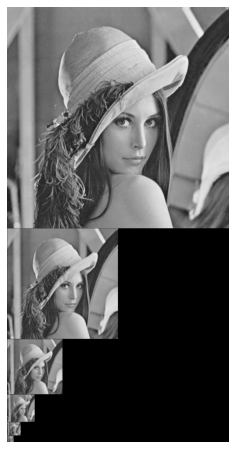

In [189]:
plt.figure(figsize=(8, 8))
plt.imshow(gPyr,cmap = 'gray')
plt.axis('off')
plt.show()

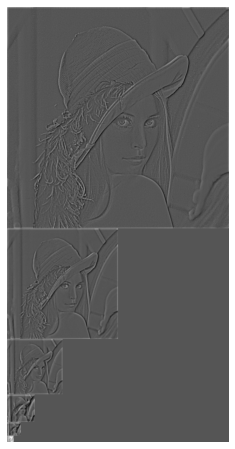

In [190]:
plt.figure(figsize=(8, 8))
plt.imshow(lPyr,cmap='gray')
plt.axis('off')
plt.show()

## Problem1 b) Create a GUI to generate binary rectangular mask

Run the cell bellow to run th GUI. Select the start point of the mask on the image and drag along the diagonal of the rectangle and release the click button to get the entire mask and the coordinates too.

In [191]:
import cv2

# now let's initialize the list of reference point
ref_point = []
crop = False

def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global ref_point, crop

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        ref_point.append((x, y))

        # draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)


# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser('')
#ap.add_argument("-i", "--image", required = True, help ="Path to the image")
#args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = gray_lena.copy()
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)


# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

if len(ref_point) == 2:
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:
                                                           ref_point[1][0]]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)

    # close all open windows
    cv2.destroyAllWindows()
mask = np.zeros(image.shape)
binary_mask = cv2.rectangle(mask,ref_point[0],ref_point[1],(255,255,255),-1)

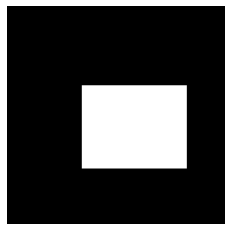

In [192]:
plt.imshow(binary_mask,cmap='gray')
plt.axis('off')
plt.show()

## Problem 1 c) Image blending using Laplacian Pyramid

In [204]:
A = cv2.imread('./A_2.jpg')
A = cv2.resize(A,(400,400))     #Resized for ease of computation and viewing
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
B = cv2.imread('./B_2.jpg')
B = cv2.resize(B,(400,400))
B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)

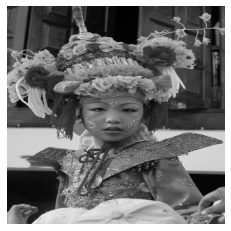

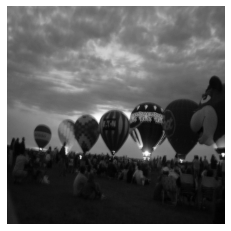

In [205]:
plt.imshow(A,cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(B,cmap='gray')
plt.axis('off')
plt.show()

Wrote the gui for creating image mask by putting LA as the input to the gui

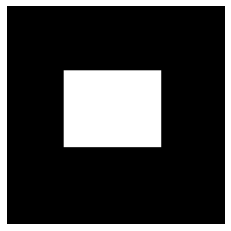

In [206]:
# now let's initialize the list of reference point
ref_point = []
crop = False

def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global ref_point, crop

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        ref_point.append((x, y))

        # draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)


# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser('')
#ap.add_argument("-i", "--image", required = True, help ="Path to the image")
#args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = A.copy()
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)


# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

if len(ref_point) == 2:
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:
                                                           ref_point[1][0]]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)

    # close all open windows
    cv2.destroyAllWindows()
mask = np.zeros(image.shape)
mask_A = cv2.rectangle(mask,ref_point[0],ref_point[1],(255,255,255),-1)

plt.imshow(mask_A,cmap = 'gray')
plt.axis('off')
plt.show()

In [207]:
def Reconstruction(laplacian_list_LA,gaussian_list_LA,laplacian_list_LB,gaussian_list_GR):
    LS = []
    for i in range(len(gaussian_list_LA)-1,-1,-1):
        flip_mask = (255-gaussian_list_GR[i])
        LS_combined = (gaussian_list_GR[i]*laplacian_list_LA[i] + (flip_mask)*laplacian_list_LB[i])/(255*255)
        LS.append(LS_combined)
    gaussian_combined = gaussian_list_GR[-1]*gaussian_list_LA[-1] + (255-gaussian_list_GR[-1])*gaussian_list_LB[-1]
    rescaled = []
    rescaled.append(LS[0])
    
    for i in range(layers):
        reconstructed_image = cv2.resize(rescaled[i],(LS[i+1].shape[0],LS[i+1].shape[1]),interpolation = cv2.INTER_NEAREST)
        kernel = np.array([[1,4,7,4,1]])
        conv_image_1 = conv2(reconstructed_image,np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2/273
        conv_image_2 = np.float32(conv_image_2)
        final = conv_image_2 + LS[i+1]
        rescaled.append(final)
    return rescaled[-1]

In [208]:
layers = 5

In [209]:
_,_,gaussian_list_LA,laplacian_list_LA = ComputePyr(A, layers)
_,_,gaussian_list_LB,laplacian_list_LB = ComputePyr(B, layers)
g,l,gaussian_list_GR,laplacian_list_GR = ComputePyr(mask_A, layers)

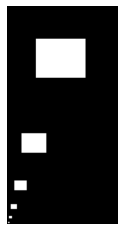

In [210]:
plt.imshow(g,cmap = 'gray')
plt.axis('off')
plt.show()

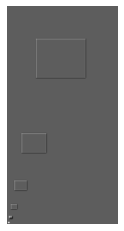

In [211]:
plt.imshow(l,cmap = 'gray')
plt.axis('off')
plt.show()

In [212]:
combined_image = Reconstruction(laplacian_list_LA,gaussian_list_LA,laplacian_list_LB,gaussian_list_GR)

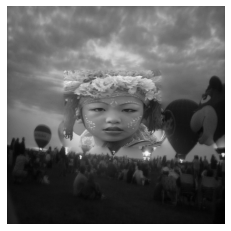

In [213]:
plt.imshow(combined_image,cmap = 'gray')
plt.axis('off')
plt.show()